In [1]:
# Group 8 Assignment : Diabetes Data Analysis

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import os
%matplotlib inline

In [3]:
# Dataset was loaded from the downloaded CSV file.
# This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.# The objective
# is to predict based on diagnostic measurements whether a patient has diabetes.

Diabetes = pd.read_csv('Downloads/diabetes.csv')
Diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Section 1: Data Definition

In [4]:
Diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
# Dataset Description

# Several constraints were placed on the selection of these instances from a larger database. In particular, all patients
# here are females at least 21 years old of Pima Indian heritage. The columns are:

# Pregnancies: Number of times pregnant
# Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# BloodPressure: Diastolic blood pressure (mm Hg)
# SkinThickness: Triceps skin fold thickness (mm)
# Insulin: 2-Hour serum insulin (mu U/ml)
# BMI: Body mass index (weight in kg/(height in m)^2) - 'Normal', 'Obesity 1', 'Obesity 2', 'Obesity 3', 'Overweight', 'Underweight'
# DiabetesPedigreeFunction: Diabetes pedigree function
# Age: Age (years)
# Outcome: Class variable (0 or 1) 


### Section 2: Data Cleaning

In [6]:
Diabetes.info()
Diabetes.duplicated().sum()
# There are 768 rows in the dataset with no null values and no missing data. Also note that there are no duplicate rows.
# The data is in the desired format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


0

In [7]:
# The quickest method here would be to do a Diabetes.describe() and look at each variable on
# its own to see if the values make sense given the description of the variable.

In [8]:
Diabetes.describe()    #.iloc[:, 1:]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
Diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

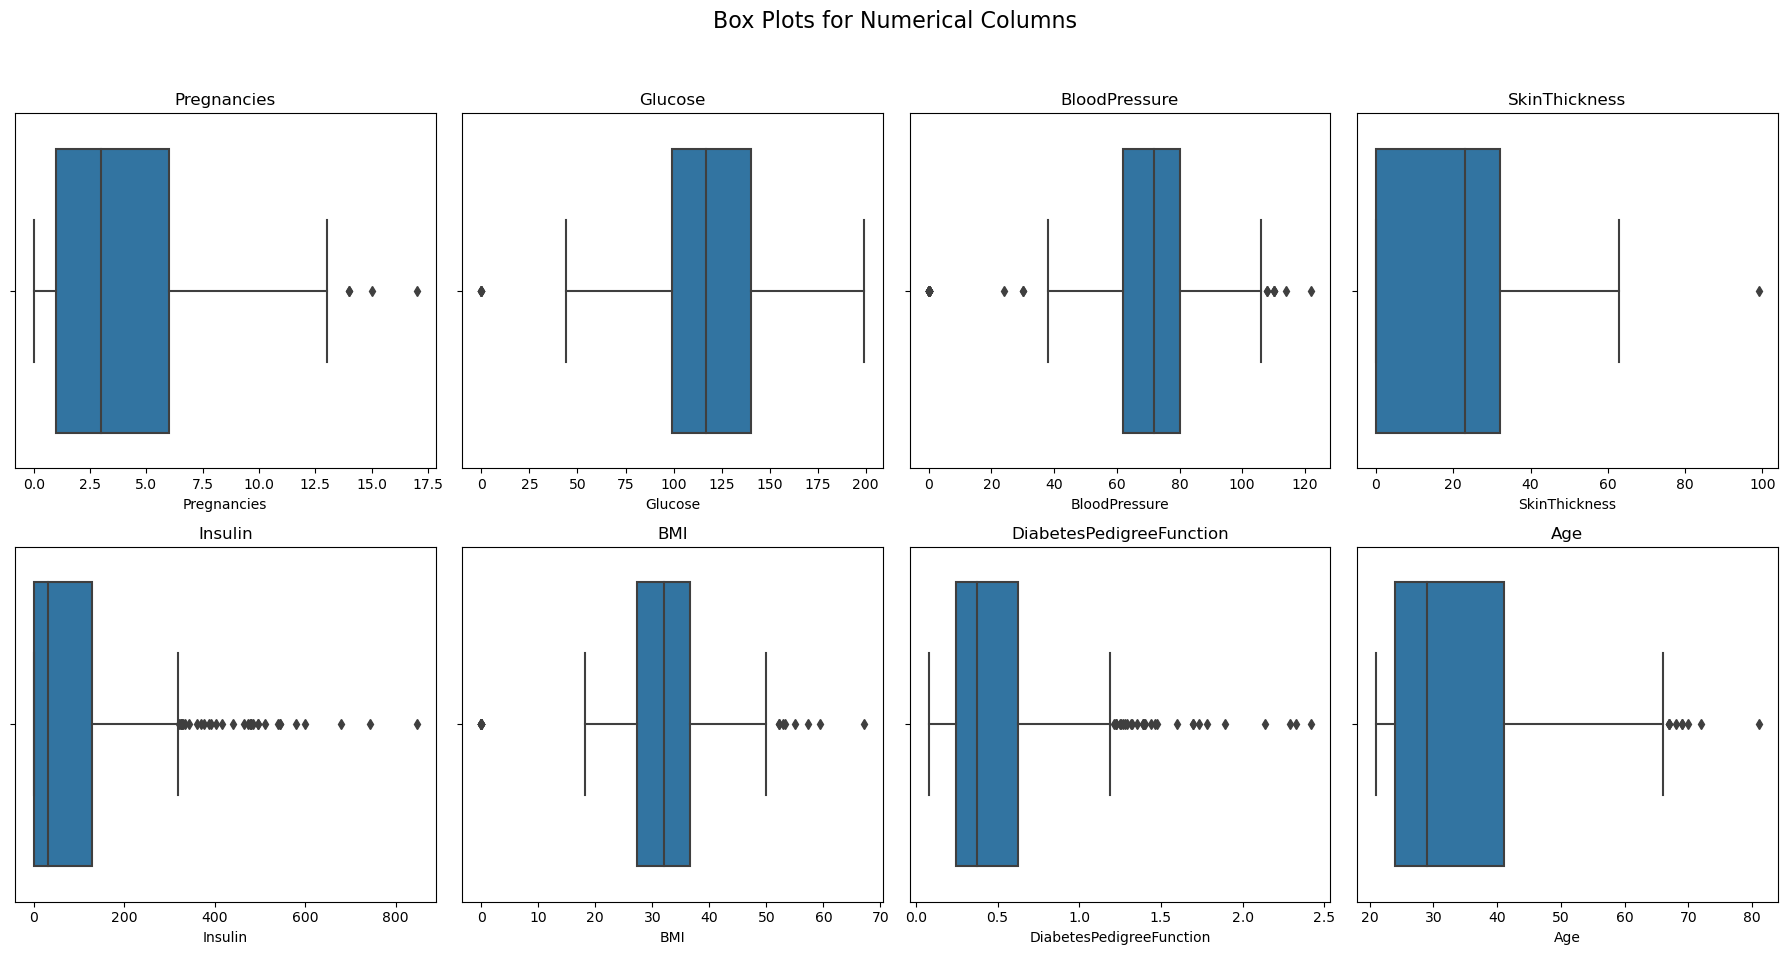

In [10]:
# Lets see the outliers.
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
fig.suptitle('Box Plots for Numerical Columns', fontsize=16)

for i, col in enumerate(columns):
    row = i // 4 
    col_pos = i % 4 
    sns.boxplot(x=Diabetes[col], ax=axes[row, col_pos]) 
    axes[row, col_pos].set_title(f'{col}')  
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [11]:

# Using the IQR, the outlier data points are the ones falling below Q1–1.5 IQR or above Q3 + 1.5 IQR. The Q1 is the 25th
# percentile and Q3 is the 75th percentile of the dataset, and IQR represents the interquartile range calculated by Q3 minus
# Q1 (Q3–Q1). Notice using . quantile() we can define Q1 and Q3

for feature in Diabetes:
    Q1 = Diabetes[feature].quantile(0.25)
    Q3 = Diabetes[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR

    outliers = ((Diabetes[feature] < lower) | (Diabetes[feature] > upper)).sum()
    
    # Calculate total number of data points
    total_points = Diabetes[feature].shape[0]
    
    # Print the number and percentage of outliers
    
    print(f"Total Outliers in {feature}: {outliers} -- {round(100 * (outliers / total_points), 2)}%")

Total Outliers in Pregnancies: 4 -- 0.52%
Total Outliers in Glucose: 5 -- 0.65%
Total Outliers in BloodPressure: 45 -- 5.86%
Total Outliers in SkinThickness: 1 -- 0.13%
Total Outliers in Insulin: 34 -- 4.43%
Total Outliers in BMI: 19 -- 2.47%
Total Outliers in DiabetesPedigreeFunction: 29 -- 3.78%
Total Outliers in Age: 9 -- 1.17%
Total Outliers in Outcome: 0 -- 0.0%


In [12]:
def remove_outliers(Diabetes, column):
    Q1 = Diabetes[column].quantile(0.25)
    Q3 = Diabetes[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return Diabetes[(Diabetes[column] >= lower_bound) & (Diabetes[column] <= upper_bound)]

for col in Diabetes.columns:
    Diabetes=remove_outliers(Diabetes,col)

In [13]:
# for feature in df:
#     Q1 = Diabetes[feature].quantile(0.25)
#     Q3 = Diabetes[feature].quantile(0.75)
#     IQR = Q3-Q1
#     lower = Q1-1.5*IQR
#     upper = Q3+1.5*IQR

#     outliers = ((Diabetes[feature] < lower) | (Diabetes[feature] > upper)).sum()
    
#     # Calculate total number of data points
#     total_points = Diabetes[feature].shape[0]
    
#     # Print the number and percentage of outliers
    
#     print(f"Total Outliers in {feature}: {outliers} -- {round(100 * (outliers / total_points), 2)}%")

In [14]:
# Let's do a boxplot and histogram as well for each variable in order to visually see if outliers exist.

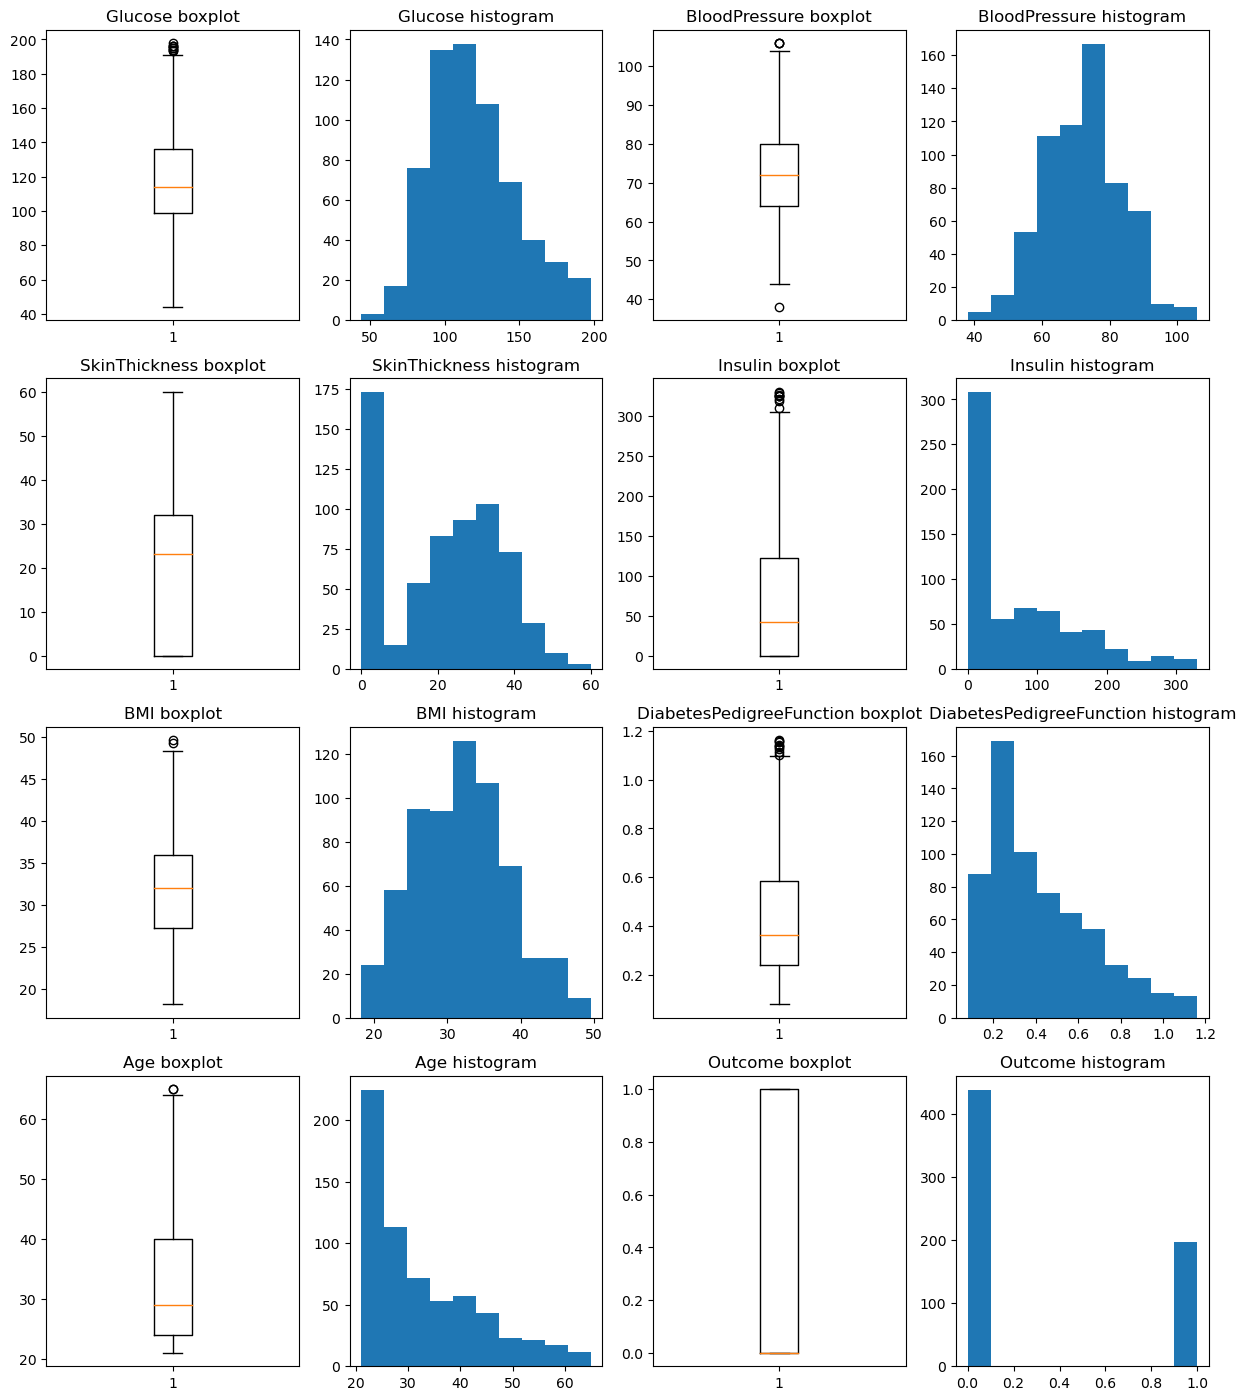

In [15]:
cont_vars = list(Diabetes.columns)[1:]
def outliers_visual(data):
    plt.figure(figsize=(15, 40))
    i = 0
    for col in cont_vars:
        i += 1
        plt.subplot(9, 4, i)
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
        i += 1
        plt.subplot(9, 4, i)
        plt.hist(data[col])
        plt.title('{} histogram'.format(col))
    plt.show()
outliers_visual(Diabetes)

In [16]:
# Visually, it is seen that there are no outliers for all of these variables - including the target variable,
# outcome. The same will be done statistically using Tukey's method below - outliers being considered anything
# outside of 1.5 times the IQR.

### Section 3: Data Exploration

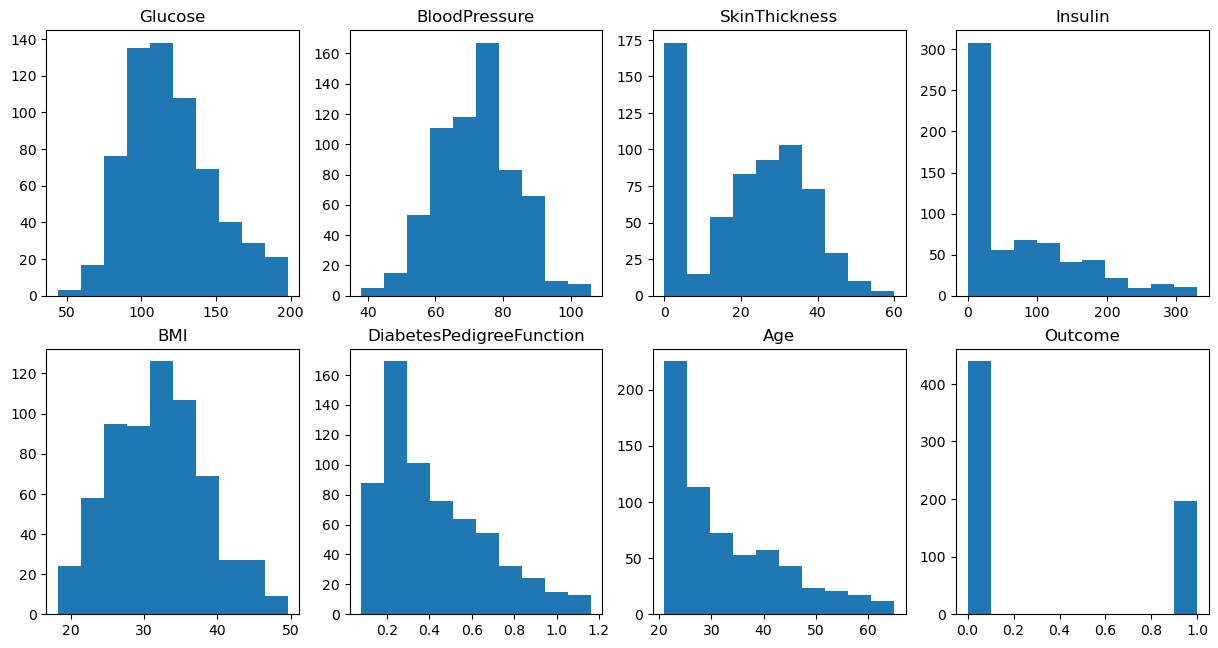

In [17]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(cont_vars, 1):
    plt.subplot(5, 4, i)
    plt.hist(Diabetes[col])
    plt.title(col)

In [18]:
# It shows that majority of the valiaribles follow the normal distribution where age and pedigee fuction has skewed to laft.

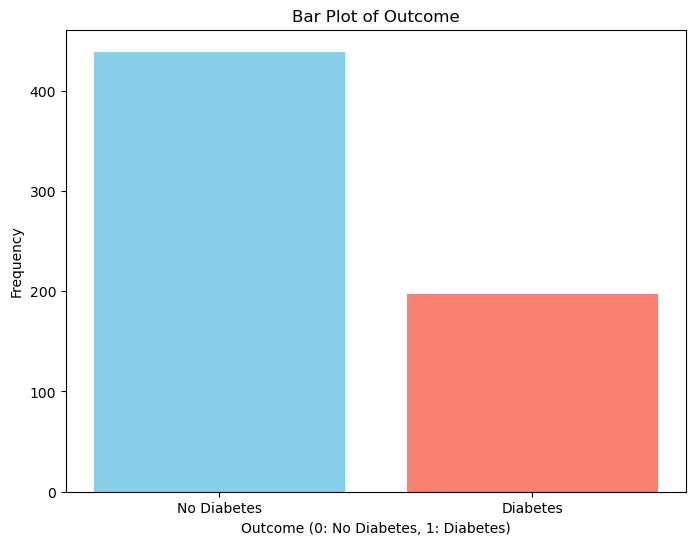

In [19]:
#barplot
outcome_counts = Diabetes['Outcome'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(outcome_counts.index, outcome_counts.values, color=['skyblue', 'salmon'])
plt.title('Bar Plot of Outcome')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()

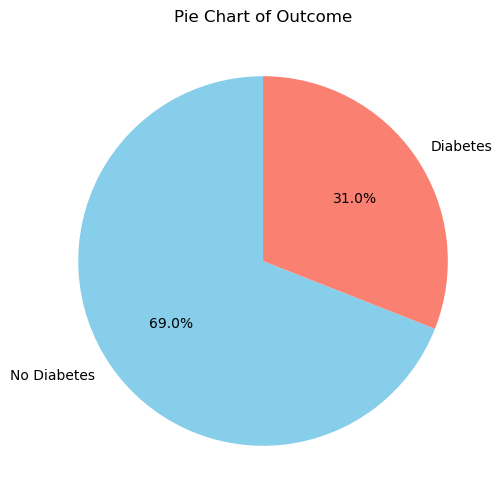

In [20]:
#pie chart
plt.figure(figsize=(8, 6))
plt.pie(outcome_counts, labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Pie Chart of Outcome')
plt.show()

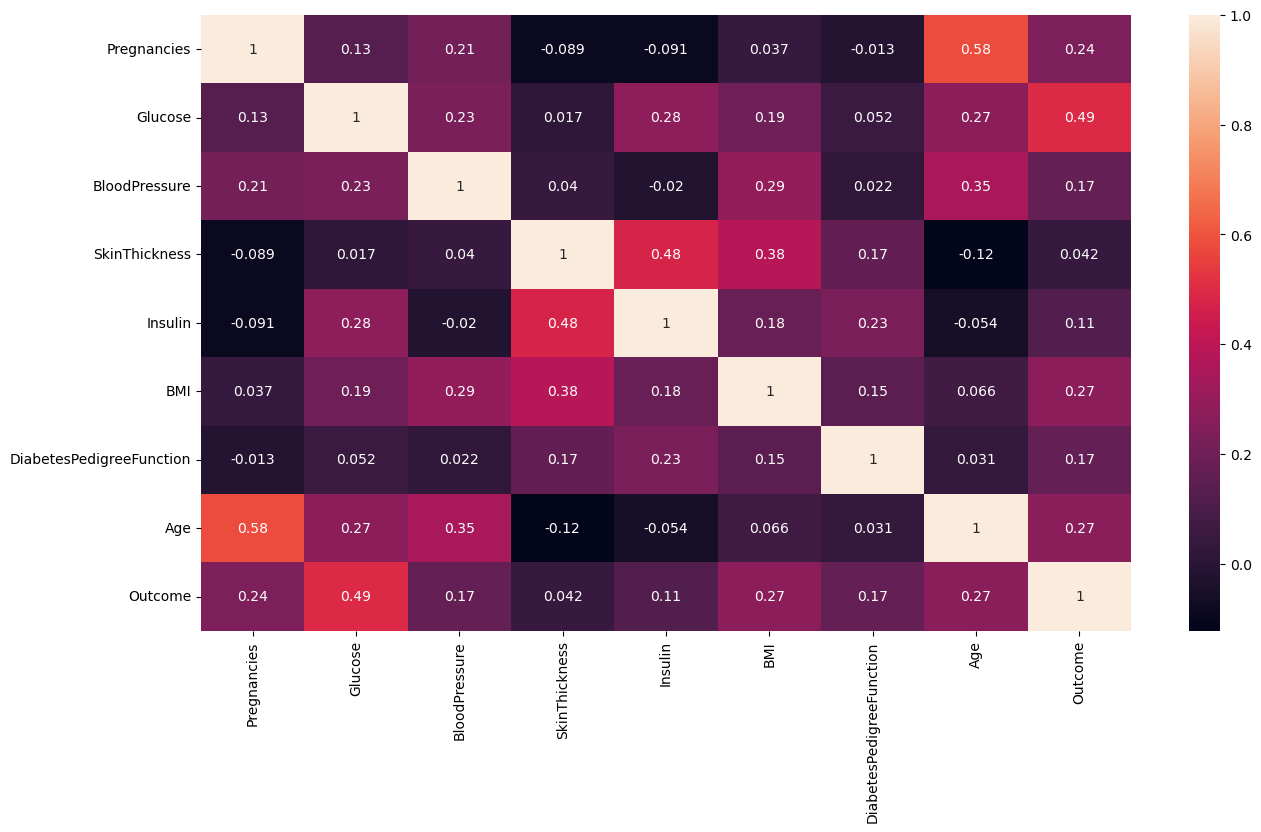

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(Diabetes.corr(),annot=True)
plt.show()

In [22]:
# Some general observations from the graphic above:

# Bar and Pie chart - in the prector valriable (outcome) about 29% shows the presence of Diabetes. This is an expected
# riality and the data cannot be treated as unbalanced dataset.

# Correlation Matrix - y (target variable) appears to be positively correlated with:
    # Glucose 0.472000 (somewhat Positive)
    # Age 0.304516 (somewhat Positive)
    # BMI 0.257296 (weak Positive)
    
# Also note that some independent varaibles are rellated to each other, for example, age and pregnancies show a
# positive correlation of 0.62, but we know that these are two independent variables, and therefore we need not
# remove any of the two due to multicollinearity. Multicollinearity is a statistical concept where several independent
# variables in a model are correlated.

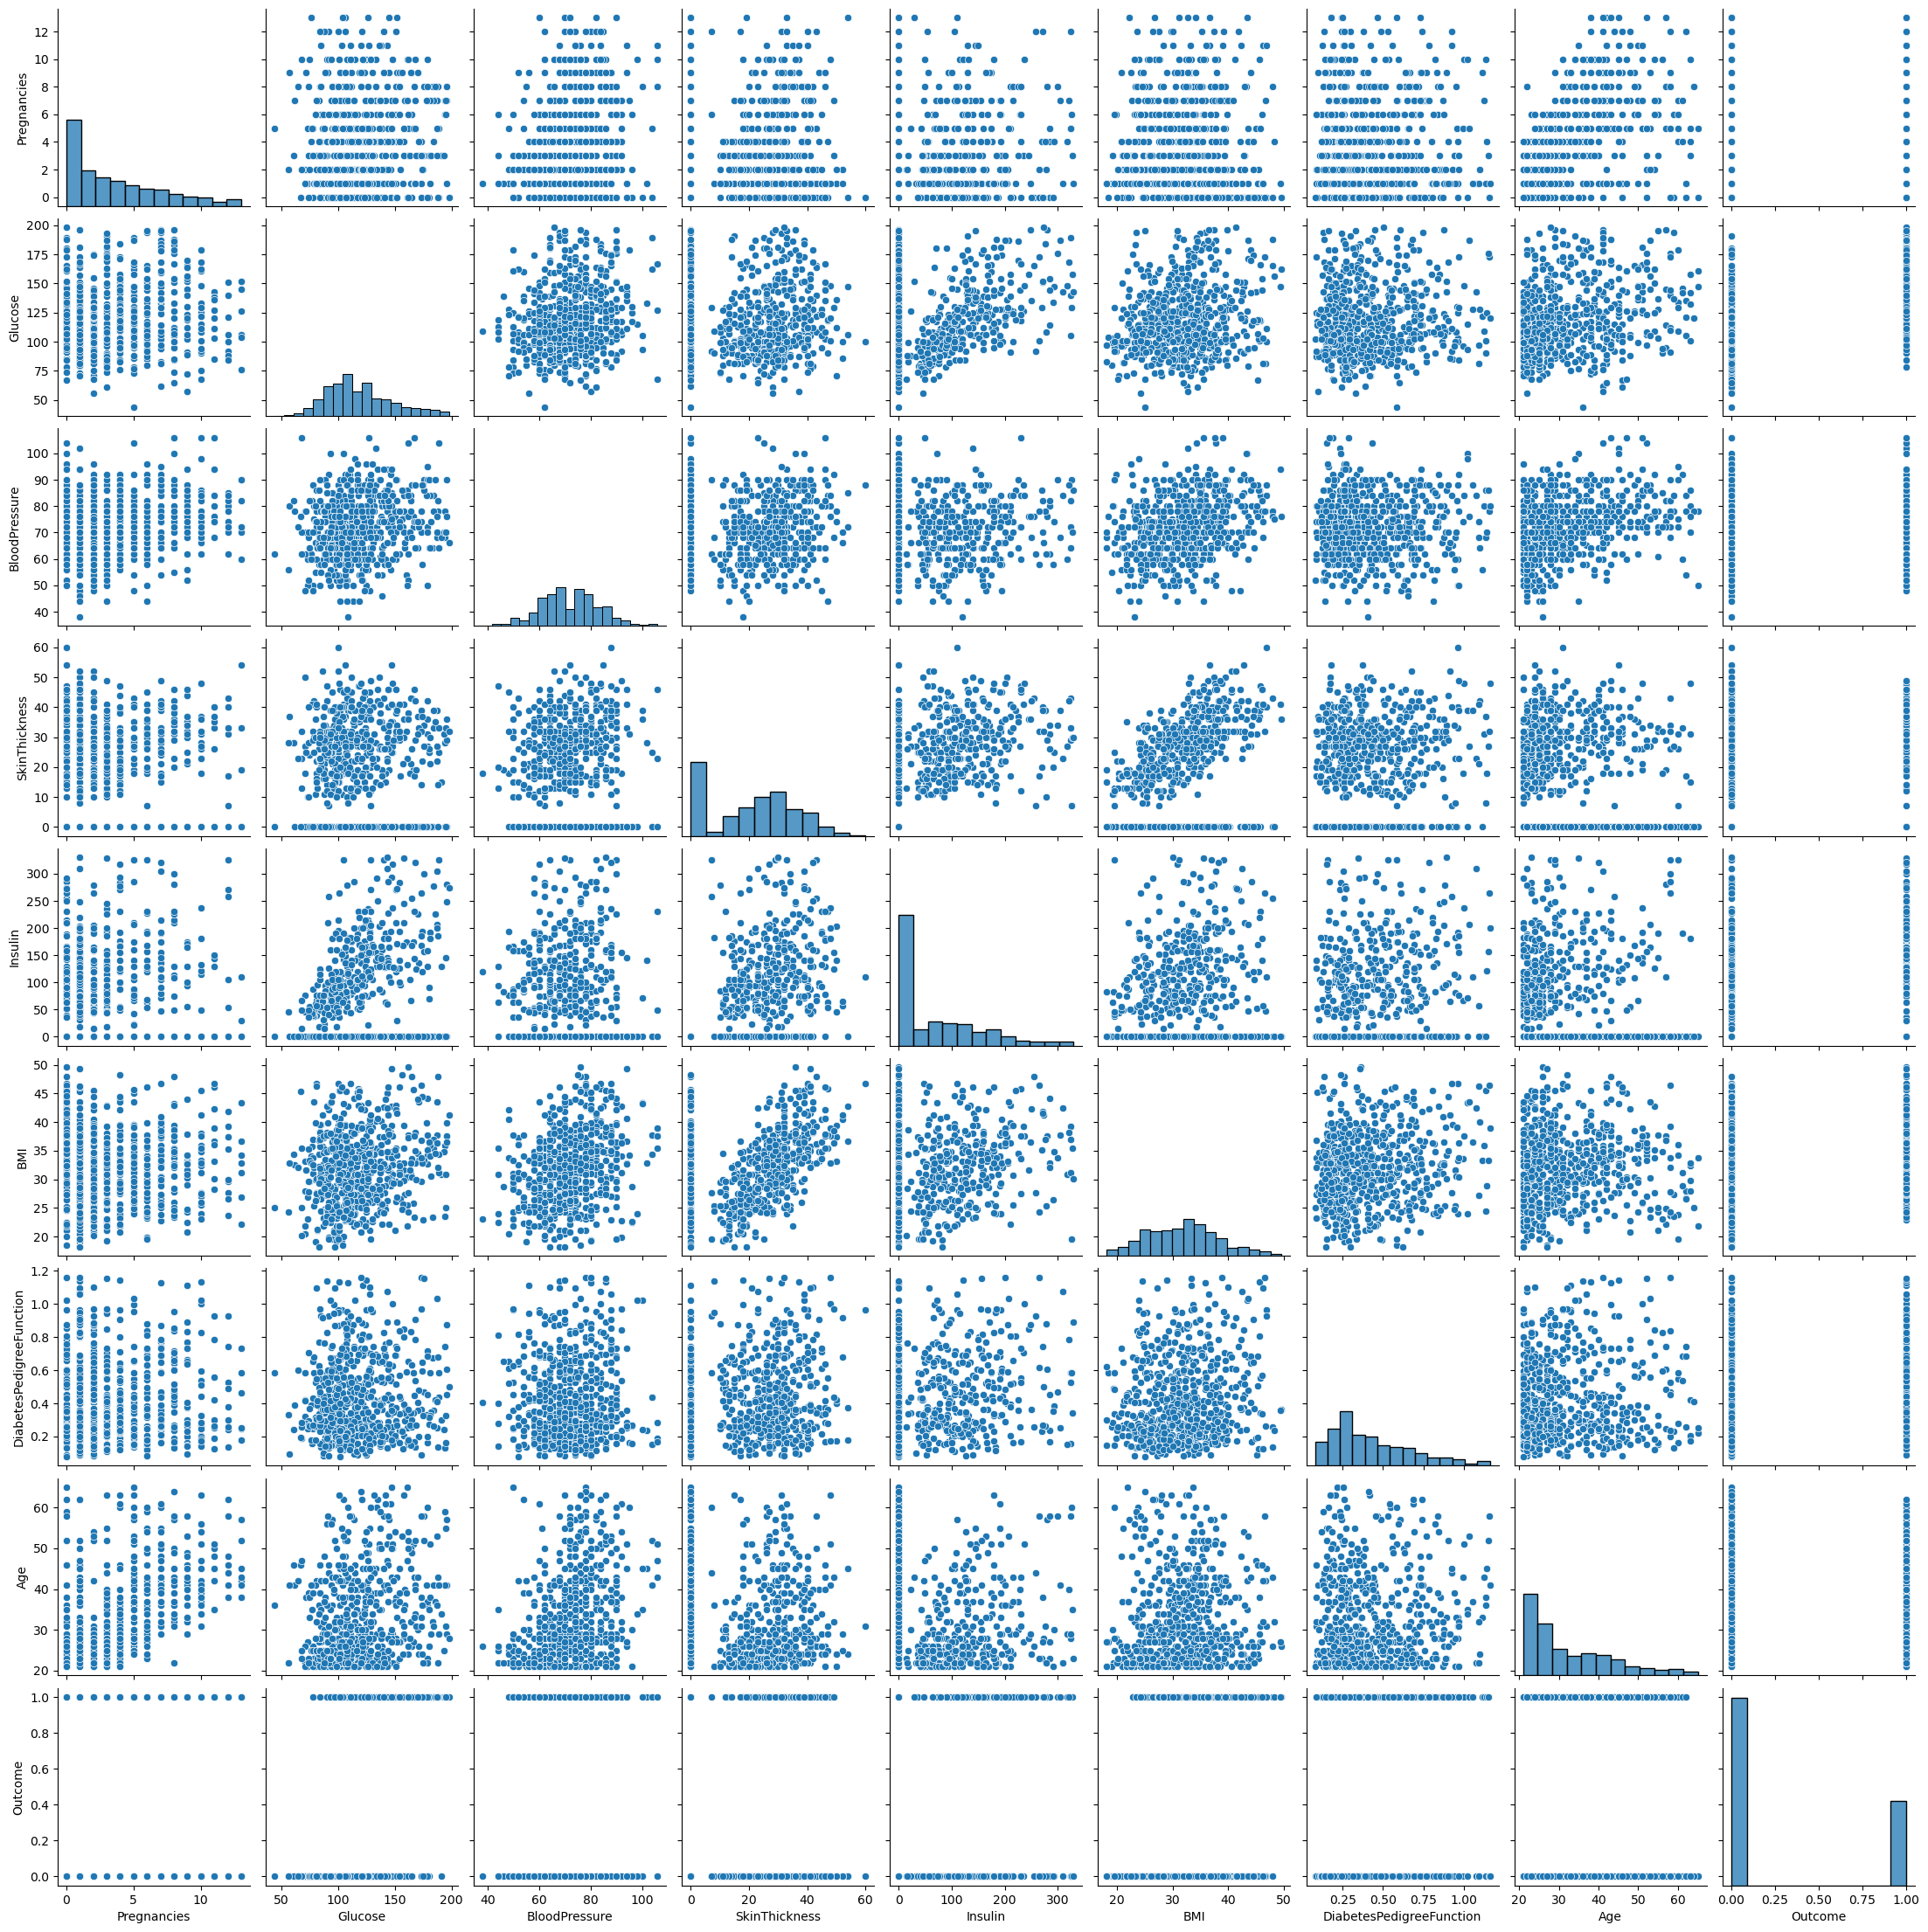

In [23]:
sns.pairplot(Diabetes)
plt.show()

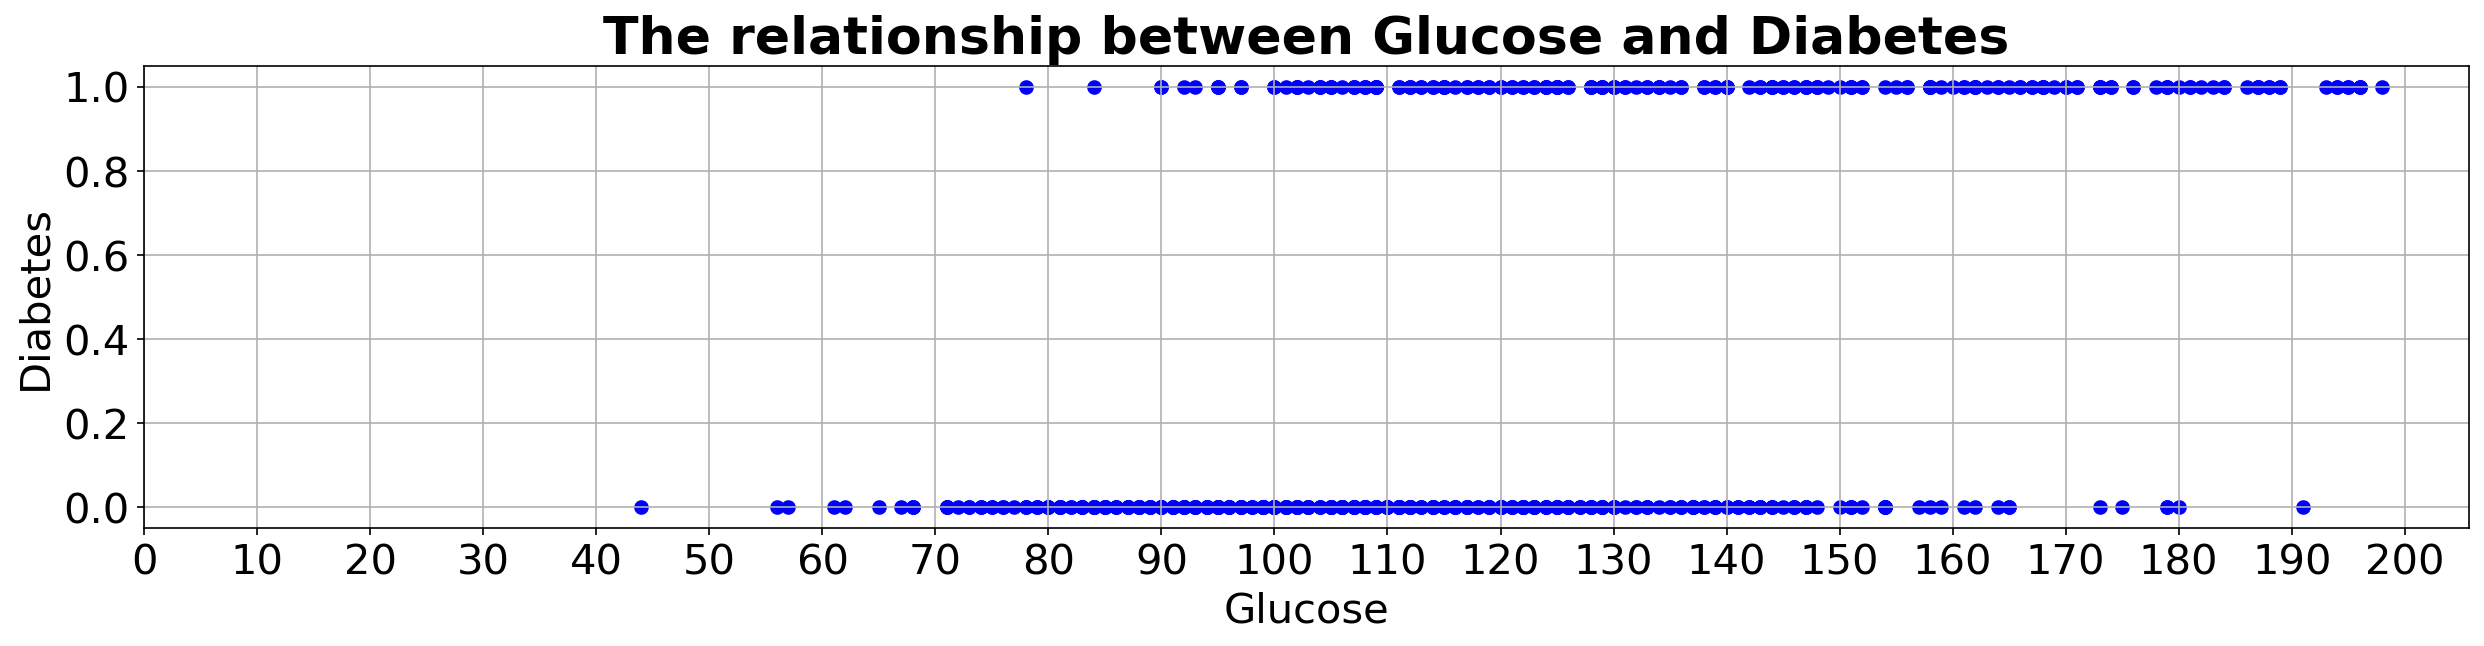

In [24]:
plt.figure(figsize = [20, 4] , dpi = 150)

plt.scatter(Diabetes['Glucose'], Diabetes['Outcome'], color = "b")

plt.title('The relationship between Glucose and Diabetes', weight='bold', fontsize = 25)
plt.xticks (range (0 , 204 , 10), fontsize = 20)
plt.yticks (fontsize = 20)
plt.xlabel ('Glucose', fontsize = 20 )
plt.ylabel ('Diabetes' , fontsize = 20)


plt.grid ()
plt.show()

# Nore the presence of diabetes with high levels of glucose.

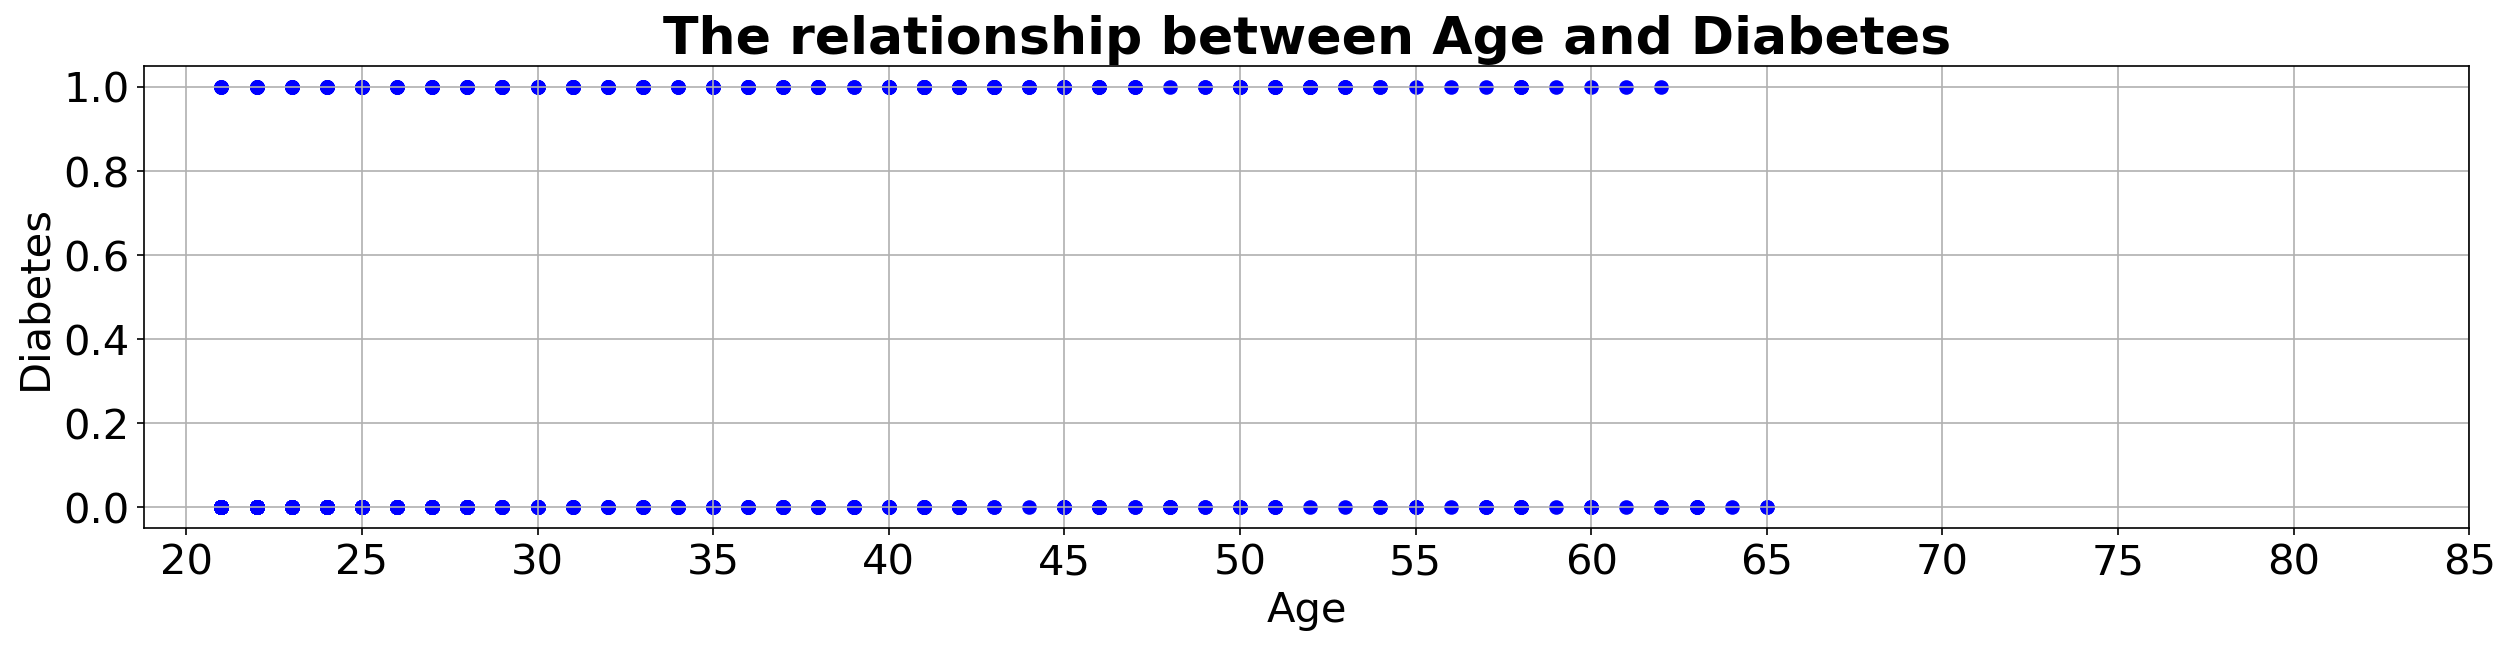

In [25]:
plt.figure(figsize = [20, 4] , dpi = 150)

plt.scatter(Diabetes['Age'], Diabetes['Outcome'], color = "b")

plt.title('The relationship between Age and Diabetes', weight='bold', fontsize = 25)
plt.xticks (range (20 , 86 , 5), fontsize = 20)
plt.yticks (fontsize = 20)
plt.xlabel ('Age', fontsize = 20 )
plt.ylabel ('Diabetes' , fontsize = 20)


plt.grid ()
plt.show()

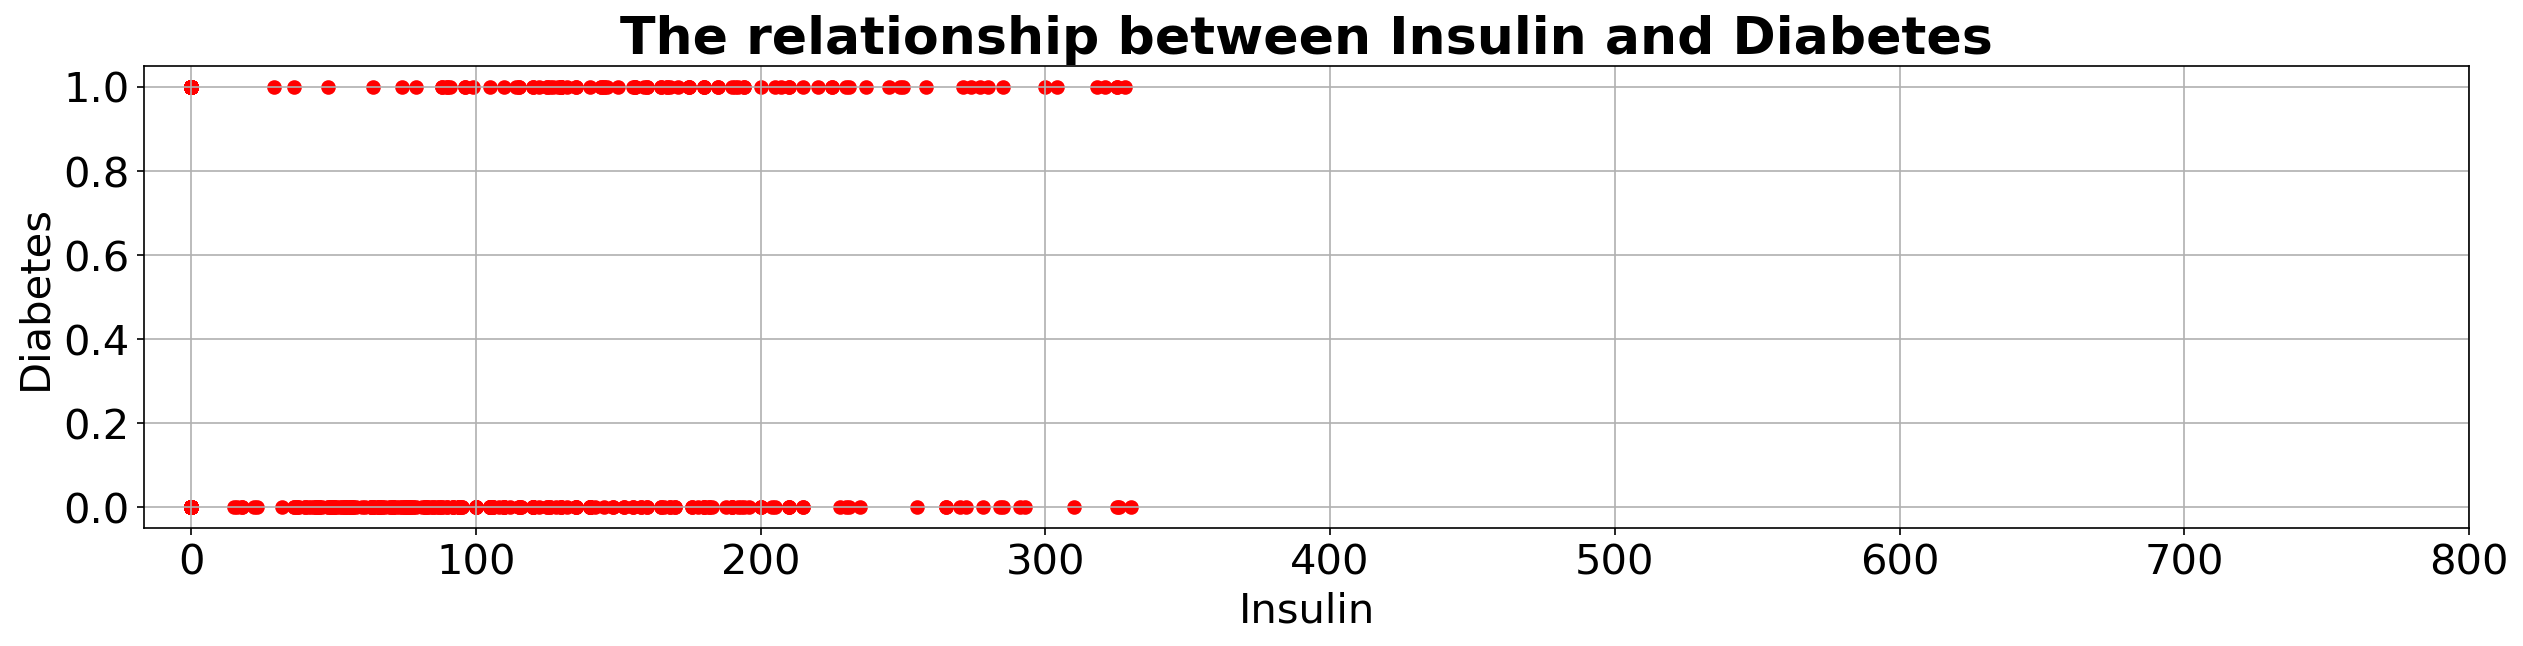

In [26]:
plt.figure(figsize = [20, 4] , dpi = 150) 
plt.scatter (Diabetes["Insulin"] , Diabetes["Outcome"] , color = "red")
plt.title ("The relationship between Insulin and Diabetes" , weight = 'bold', fontsize = 25)
plt.xticks (range (0 , 900 , 100) , fontsize = 20)
plt.yticks (fontsize = 20)
plt.xlabel ('Insulin', fontsize = 20 )
plt.ylabel ('Diabetes' , fontsize = 20)
plt.grid ()
plt.show ()

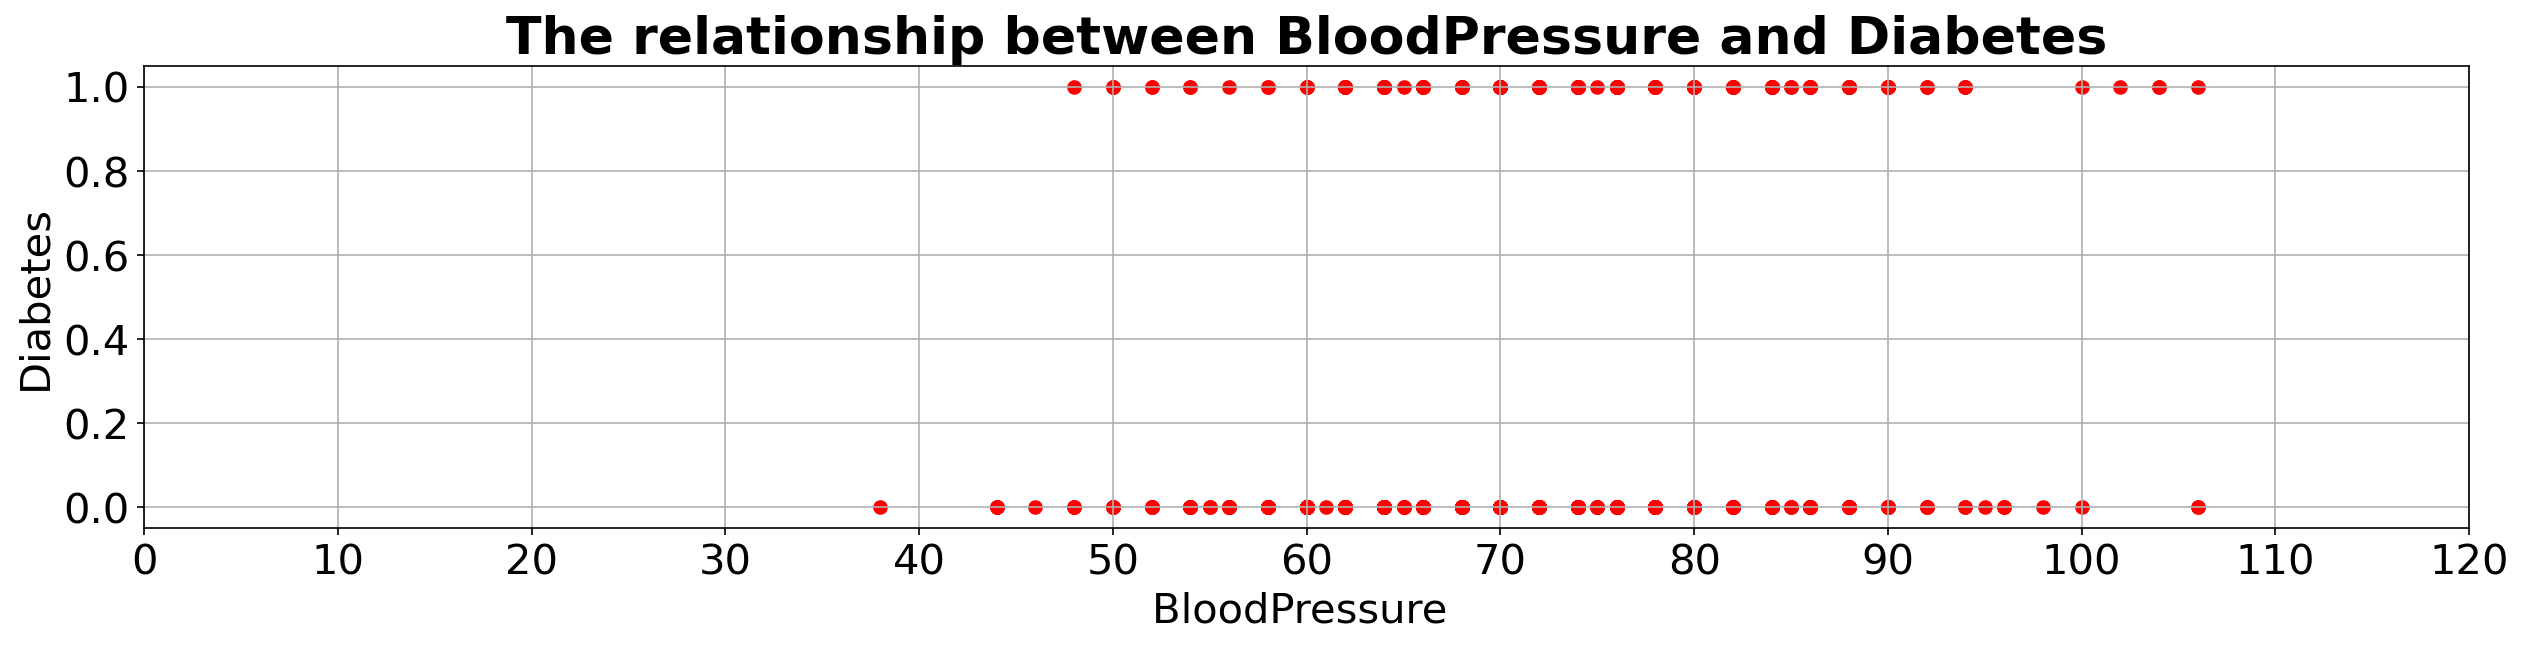

In [27]:
plt.figure(figsize = [20, 4] , dpi = 150) 
plt.scatter (Diabetes["BloodPressure"] , Diabetes["Outcome"] , color = "red")
plt.title ("The relationship between BloodPressure and Diabetes" , weight = 'bold', fontsize = 25)
plt.xticks (range (0 , 125 , 10) , fontsize = 20)
plt.yticks (fontsize = 20)
plt.xlabel ('BloodPressure ', fontsize = 20)
plt.ylabel ('Diabetes' , fontsize = 20)
plt.grid ()
plt.show ()

# There is no relationship between Women with blood pressure and those who have diabetes

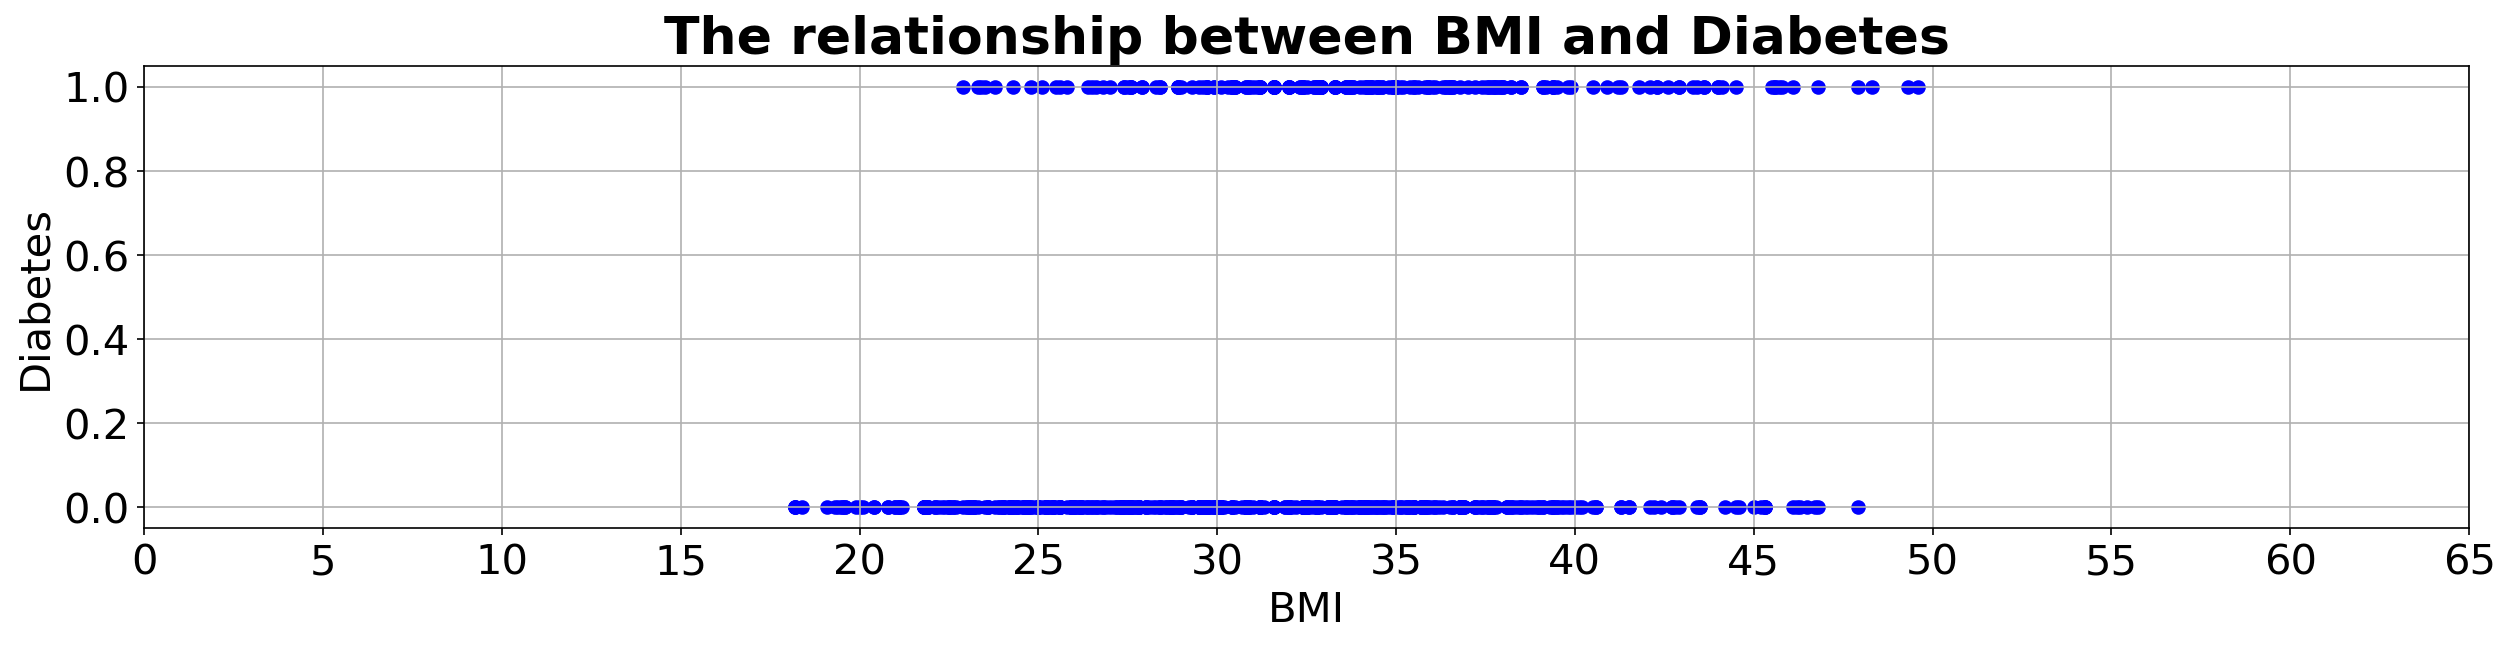

In [28]:
plt.figure(figsize = [20, 4] , dpi = 150) 
plt.scatter (Diabetes["BMI"] , Diabetes["Outcome"] , color = "b")
plt.title ("The relationship between BMI and Diabetes" , weight = 'bold', fontsize = 25)
plt.xticks (range (0 , 70 , 5) , fontsize=20)
plt.yticks (fontsize = 20)
plt.xlabel ('BMI', fontsize = 20 )
plt.ylabel ('Diabetes' , fontsize = 20)
plt.grid ()
plt.show ()

# Women with a high BMI have a greater chance of developing diabetes.

In [29]:
# dataset after removing outliers

Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               636 non-null    int64  
 1   Glucose                   636 non-null    int64  
 2   BloodPressure             636 non-null    int64  
 3   SkinThickness             636 non-null    int64  
 4   Insulin                   636 non-null    int64  
 5   BMI                       636 non-null    float64
 6   DiabetesPedigreeFunction  636 non-null    float64
 7   Age                       636 non-null    int64  
 8   Outcome                   636 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 49.7 KB


### Section 4: Create Models

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, mean_squared_error, r2_score, recall_score, classification_report,f1_score

In [31]:
X = Diabetes.drop('Outcome', axis=1)  
y = Diabetes['Outcome']

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               636 non-null    int64  
 1   Glucose                   636 non-null    int64  
 2   BloodPressure             636 non-null    int64  
 3   SkinThickness             636 non-null    int64  
 4   Insulin                   636 non-null    int64  
 5   BMI                       636 non-null    float64
 6   DiabetesPedigreeFunction  636 non-null    float64
 7   Age                       636 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 44.7 KB


In [33]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 636 entries, 0 to 767
Series name: Outcome
Non-Null Count  Dtype
--------------  -----
636 non-null    int64
dtypes: int64(1)
memory usage: 9.9 KB


In [34]:
# Split dataset for training and test (validation) on the besis of 80-20 basis
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 338 to 358
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               128 non-null    int64  
 1   Glucose                   128 non-null    int64  
 2   BloodPressure             128 non-null    int64  
 3   SkinThickness             128 non-null    int64  
 4   Insulin                   128 non-null    int64  
 5   BMI                       128 non-null    float64
 6   DiabetesPedigreeFunction  128 non-null    float64
 7   Age                       128 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 9.0 KB


In [36]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Generate confusion matrix and classification report
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    # Display the results
    print(f'{model_name} Accuracy: {accuracy:.2f}')
    print(f'{model_name} Classification Report:\n{class_report}')
    
    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Diabetes', 'Diabetes'])
    disp.plot(cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()
    
    return accuracy 

In [37]:
# Lets fix LogisticRegression model.

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Logistic Regression Accuracy: 0.73
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82        92
           1       0.52      0.36      0.43        36

    accuracy                           0.73       128
   macro avg       0.65      0.62      0.62       128
weighted avg       0.70      0.73      0.71       128



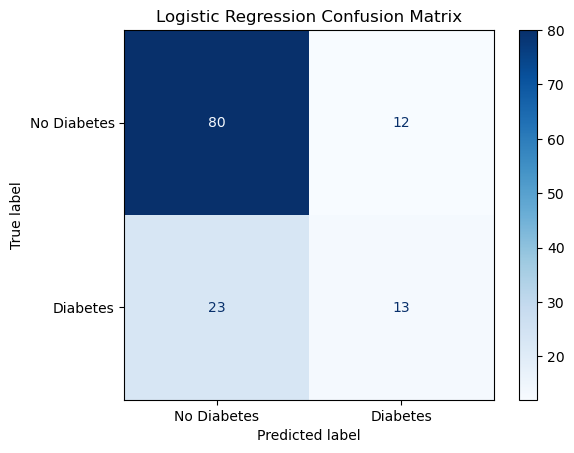

0.7265625

In [38]:
log_reg_accuracy =evaluate_model(log_reg, X_test, y_test, 'Logistic Regression')
log_reg_accuracy

In [39]:
# Let's fix Support Vector Machines model.

svc = SVC()
svc.fit(X_train, y_train)

SVC()

Support Vector Classifier Accuracy: 0.74
Support Vector Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83        92
           1       0.57      0.36      0.44        36

    accuracy                           0.74       128
   macro avg       0.67      0.63      0.64       128
weighted avg       0.72      0.74      0.72       128



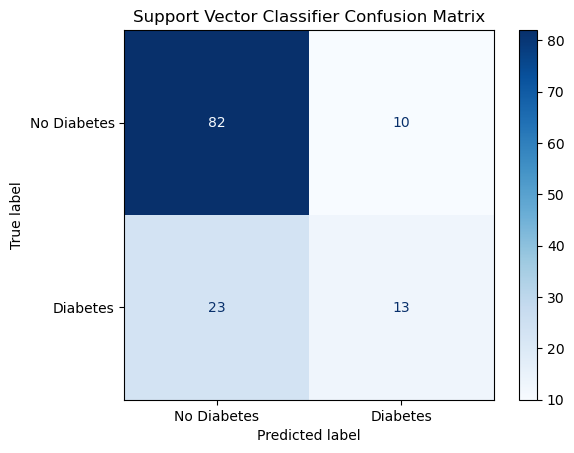

0.7421875

In [40]:
svc_accuracy =evaluate_model(svc, X_test, y_test, 'Support Vector Classifier')
svc_accuracy

In [41]:
# Let's fix RandomForest model.

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

Random Forest Classifier Accuracy: 0.72
Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        92
           1       0.50      0.44      0.47        36

    accuracy                           0.72       128
   macro avg       0.65      0.64      0.64       128
weighted avg       0.71      0.72      0.71       128



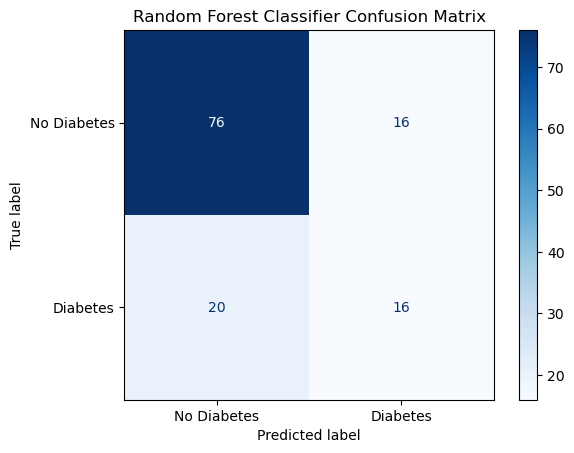

0.71875

In [42]:
rf_accuracy= evaluate_model(rf, X_test, y_test, 'Random Forest Classifier')
rf_accuracy

In [43]:
# Let's fix GradientBoosting model.

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

Gradient Boosting Classifier Accuracy: 0.76
Gradient Boosting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83        92
           1       0.57      0.56      0.56        36

    accuracy                           0.76       128
   macro avg       0.70      0.70      0.70       128
weighted avg       0.76      0.76      0.76       128



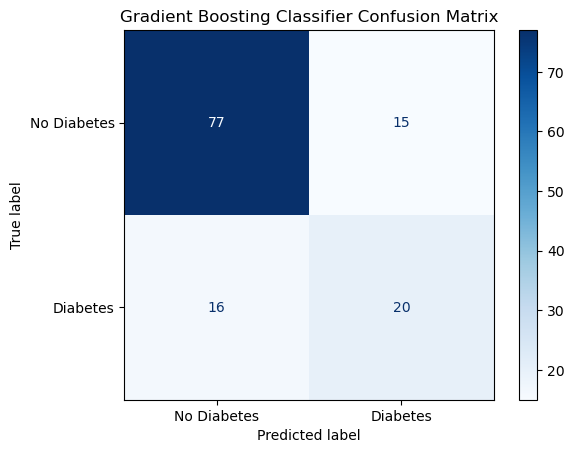

0.7578125

In [44]:
gbc_accuracy = evaluate_model(gbc, X_test, y_test, 'Gradient Boosting Classifier')
gbc_accuracy

In [45]:
# Hyperparameter Search for LogReg

from sklearn.model_selection import GridSearchCV

In [46]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],         # Regularization type
    'solver': ['liblinear']          # Solver for optimization
}

In [47]:
log_reg = LogisticRegression()

In [48]:
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

In [49]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy', verbose=1)

In [50]:
print(f'Best parameters: {grid_search.best_params_}')

Best parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


Optimized Logistic Regression Accuracy: 0.73
Optimized Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        92
           1       0.54      0.36      0.43        36

    accuracy                           0.73       128
   macro avg       0.66      0.62      0.63       128
weighted avg       0.71      0.73      0.72       128



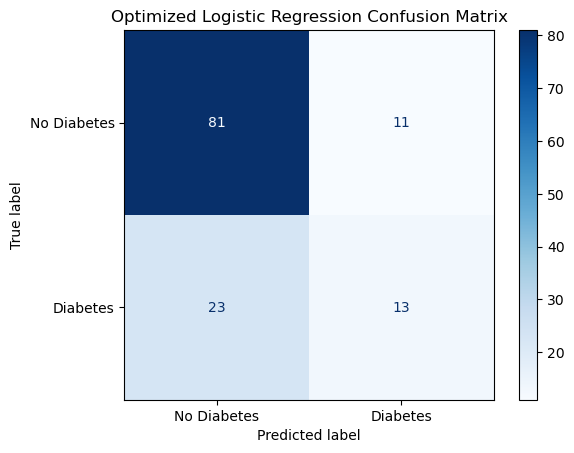

0.734375

In [51]:
best_log_reg = grid_search.best_estimator_
optimized_log_reg_accuracy =evaluate_model(best_log_reg, X_test, y_test, 'Optimized Logistic Regression')
optimized_log_reg_accuracy

In [52]:
algorithms = ['Logistic Regression', 'Support Vector Classifier', 'Random Forest', 'Gradient Boosting', 'Optimized Logistic Regression']
accuracies = [log_reg_accuracy, svc_accuracy, rf_accuracy, gbc_accuracy, optimized_log_reg_accuracy]

results_df = pd.DataFrame({'Algorithms': algorithms, 'Accuracies': accuracies})


results_df

,Algorithms,Accuracies
0,Logistic Regression,0.726562
1,Support Vector Classifier,0.742188
2,Random Forest,0.718750
3,Gradient Boosting,0.757812
4,Optimized Logistic Regression,0.734375


In [53]:
# Let's do more analysis on th emodel fitting.

In [54]:
algorithm = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','SVC']
acc=[]
recall= []
RMSE = []
f11 = []

In [55]:
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = RandomForestClassifier(class_weight ='balanced',criterion = 'entropy', max_depth = 15, max_features = 0.75, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
model4 = GradientBoostingClassifier(learning_rate = 0.1, loss = 'exponential', n_estimators = 150)
model5 = SVC()
# model6 = LinearRegression()

In [56]:
def models(model):
    model.fit(X_train,y_train)
    pre = model.predict(X_test)
    score = accuracy_score(pre,y_test)
    recal = recall_score(pre,y_test)
    f1 = f1_score(pre,y_test)
    rmse = np.sqrt(mean_squared_error(y_test,pre))
    acc.append(score)
    recall.append(recal)
    f11.append(f1)
    RMSE.append(rmse)
    sns.heatmap(confusion_matrix(pre,y_test),annot =True)
    
    print(model)
    
    print(f'The accuracy of model is :{score} and the recall is {recal} and the f1 score is : {f1} and the mean spaired erroe is :{rmse}')

C:\Users\ttang\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()
The accuracy of model is :0.7265625 and the recall is 0.52 and the f1 score is : 0.42622950819672134 and the mean spaired erroe is :0.5229125165837972


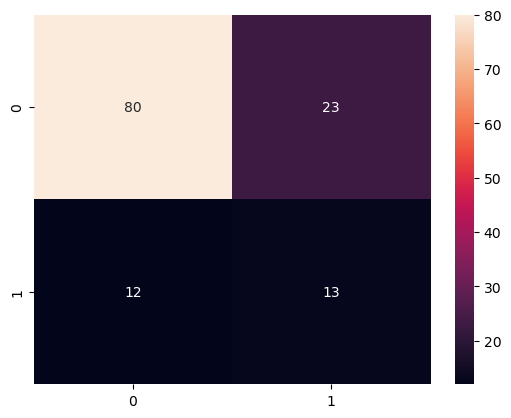

In [57]:
models(model1)

DecisionTreeClassifier()
The accuracy of model is :0.765625 and the recall is 0.5789473684210527 and the f1 score is : 0.5945945945945946 and the mean spaired erroe is :0.4841229182759271


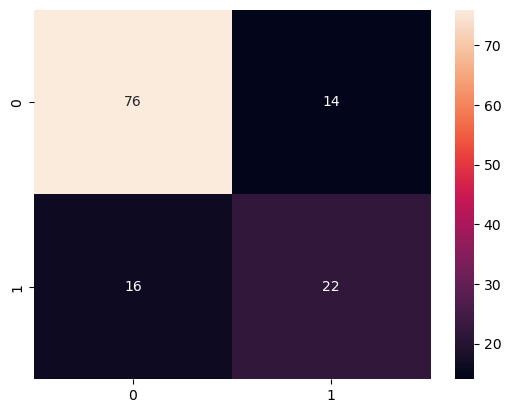

In [58]:
models(model2)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=15, max_features=0.75, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=130)
The accuracy of model is :0.75 and the recall is 0.55 and the f1 score is : 0.5789473684210527 and the mean spaired erroe is :0.5


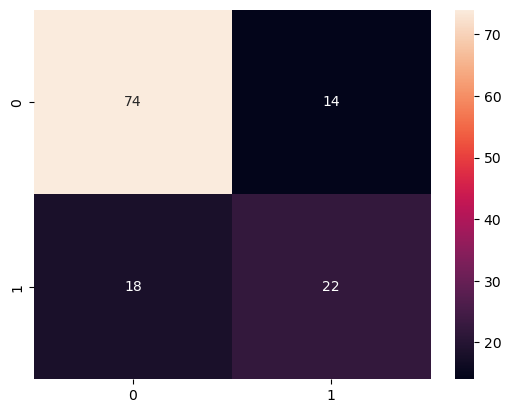

In [59]:
models(model3)

GradientBoostingClassifier(loss='exponential', n_estimators=150)
The accuracy of model is :0.7734375 and the recall is 0.6 and the f1 score is : 0.591549295774648 and the mean spaired erroe is :0.4759858191164943


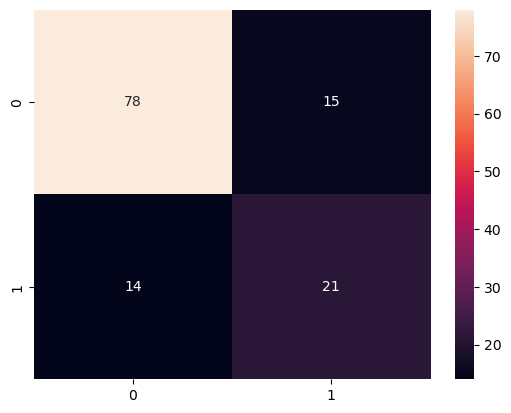

In [60]:
models(model4)

SVC()
The accuracy of model is :0.7421875 and the recall is 0.5652173913043478 and the f1 score is : 0.44067796610169496 and the mean spaired erroe is :0.5077524002897476


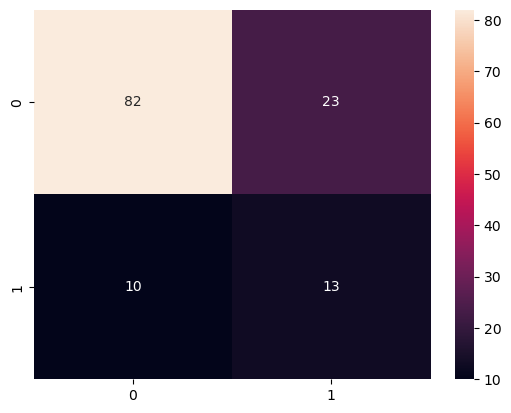

In [61]:
models(model5)

In [62]:
results_df = pd.DataFrame({'Algorithm':algorithm, 'Accuracy': acc,'recall' : recall,"f1":f11,'RMSE':RMSE})
results_df

,Algorithm,Accuracy,recall,f1,RMSE
0,LogisticRegression,0.726562,0.520000,0.426230,0.522913
1,DecisionTreeClassifier,0.765625,0.578947,0.594595,0.484123
2,RandomForestClassifier,0.750000,0.550000,0.578947,0.500000
3,GradientBoostingClassifier,0.773438,0.600000,0.591549,0.475986
4,SVC,0.742188,0.565217,0.440678,0.507752


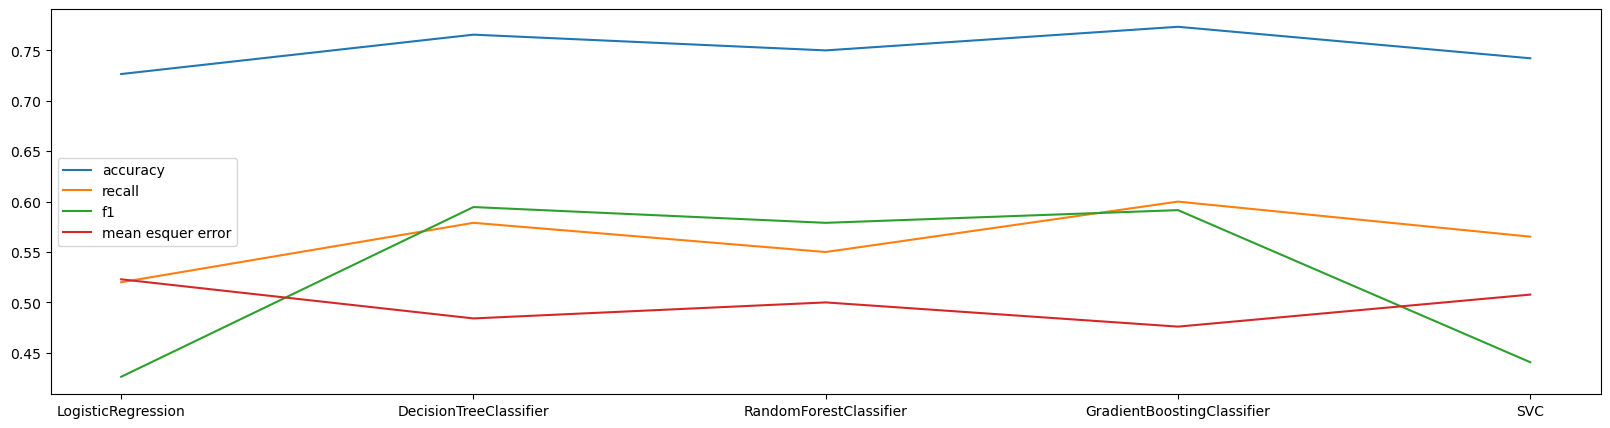

In [63]:
fif,ax= plt.subplots(figsize = (20,5))
plt.plot(results_df.Algorithm, acc, label='accuracy')
plt.plot(results_df.Algorithm, recall,label='recall')
plt.plot(results_df.Algorithm, f11,label='f1')
plt.plot(results_df.Algorithm, RMSE,label='mean esquer error')

plt.legend()
plt.show()

In [64]:
# Based on these findings we can conclude that the best model is GradientBoostingClassifier.

# The above models are the most common ones to fit to a binary outcome. A linear regression model can also be used for
# predictions; however, this is somewhat less common. The liner regression model was ommitted.

### Section 5 - Another approach for model fitting

In [65]:
# As you note, the model fitting in Section 4 was done with minimal transformations to the independent variables. We just
# took the outliers off from the dataset.

# However, this approach is more focused on data transformations and feature management. With this approach
# we were able to achive significanly accurate models for predictions.

In [66]:
Diabetes_2 = pd.read_csv('Downloads/diabetes.csv')
Diabetes_2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [67]:
Diabetes_2.shape

(768, 9)

In [68]:
Diabetes_2.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [69]:
Diabetes_2.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [70]:
# We replace the zero values in the dataset with NaNs (Null) with the suspision that zero values may be incorrently enterted
# as there are no observations or may be that the missing values in the origonal data set may have been replaced with zero.

Diabetes_2[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] = Diabetes_2[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.NaN)

In [71]:
Diabetes_2.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [72]:
Diabetes_2.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5.0,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10.0,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8.0,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [73]:
# The missing values are replaved by the meadian value after excluding NaNs for outcome 1 anf 0 separately for each variable.
# Gupta et al. and Maulana et al. [9,10] chose to replace missing values with the median value, asserting that
# this substitution increased model accuracy and precision greately.

def median_target(var):   
    temp = Diabetes_2[Diabetes_2[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [74]:
# The NaNs are replaced with the meadian value of earch variable, depending on th eoutcome either 0 or 1.
columns = Diabetes_2.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    Diabetes_2.loc[(Diabetes_2['Outcome'] == 0 ) & (Diabetes_2[i].isnull()), i] = median_target(i)[i][0]
    Diabetes_2.loc[(Diabetes_2['Outcome'] == 1 ) & (Diabetes_2[i].isnull()), i] = median_target(i)[i][1]

In [75]:
Diabetes_2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [76]:
Diabetes_2.shape

(768, 9)

In [77]:
Diabetes_2.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [78]:
for feature in Diabetes_2:
    Q1 = Diabetes_2[feature].quantile(0.25)
    Q3 = Diabetes_2[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    if Diabetes_2[(Diabetes_2[feature]>upper)].any(axis=None):
        print(feature, "yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


In [79]:
Q1 = Diabetes_2.Insulin.quantile(0.25)
Q3 = Diabetes_2.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
Diabetes_2.loc[Diabetes_2['Insulin']>upper, "Insulin"] = upper

In [80]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=10)
lof.fit_predict(Diabetes_2)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [81]:
data_scores = lof.negative_outlier_factor_
np.sort(data_scores)[0:20]

array([-3.06509976, -2.38250393, -2.15557018, -2.11501347, -2.08356175,
       -1.95386655, -1.83559384, -1.74974237, -1.7330214 , -1.71017168,
       -1.70215105, -1.68722889, -1.64294601, -1.64180205, -1.61181746,
       -1.61067772, -1.60925053, -1.60214364, -1.59998552, -1.58761193])

In [82]:
thresold = np.sort(data_scores)[5]

In [83]:
thresold

-1.9538665533171866

In [84]:
outlier = data_scores>thresold

In [85]:
outlier

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,

In [86]:
Diabetes_2 = Diabetes_2[outlier]

In [87]:
Diabetes_2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,102.5,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,32.0,169.5,30.1,0.349,47,1


In [88]:
# Some new variables are added to the dataframe. The fisrt is the NewBMI.
# Healthcare providers use BMI to help diagnose weight types and as a screening tool for certain health conditions.
# Diagnosing weight types with BMI - In general, the following BMI ranges (in kg/m2) classify different weight types:
# Underweight: Less than 18.5.
# Optimum range: 18.5 to 24.9.
# Overweight: 25 to 29.9.
# Class I obesity: 30 to 34.9.
# Class II obesity: 35 to 39.9.
# Class III obesity: More than 40.    
NewBMI = pd.Series(["Underweight","Normal", "Overweight","Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

In [89]:
NewBMI

0    Underweight
1         Normal
2     Overweight
3      Obesity 1
4      Obesity 2
5      Obesity 3
dtype: category
Categories (6, object): ['Normal', 'Obesity 1', 'Obesity 2', 'Obesity 3', 'Overweight', 'Underweight']

In [90]:
Diabetes_2['NewBMI'] = NewBMI
Diabetes_2.loc[Diabetes_2["BMI"]<18.5, "NewBMI"] = NewBMI[0]
Diabetes_2.loc[(Diabetes_2["BMI"]>18.5) & Diabetes_2["BMI"]<=24.9, "NewBMI"] = NewBMI[1]
Diabetes_2.loc[(Diabetes_2["BMI"]>24.9) & Diabetes_2["BMI"]<=29.9, "NewBMI"] = NewBMI[2]
Diabetes_2.loc[(Diabetes_2["BMI"]>29.9) & Diabetes_2["BMI"]<=34.9, "NewBMI"] = NewBMI[3]
Diabetes_2.loc[(Diabetes_2["BMI"]>34.9) & Diabetes_2["BMI"]<=39.9, "NewBMI"] = NewBMI[4]
Diabetes_2.loc[Diabetes_2["BMI"]>39.9, "NewBMI"] = NewBMI[5]

C:\Users\ttang\AppData\Local\Temp\ipykernel_28820\2673828782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Diabetes_2['NewBMI'] = NewBMI


In [91]:
Diabetes_2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 2
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Obesity 2
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Obesity 2
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Obesity 2
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3


In [92]:
# The secone new variable is the NewInsulinScore.
# The insuling levels of female are:
# The insulin levels are considered normal if they're under 16 mIU/L and if over 166 mIU/L is consudered abnormal.
# Using commercial assays, normal fasting insulin levels range between 5 and 15 µU/mL

def set_insuline(row):
    if row["Insulin"]>=16 and row["Insulin"]<=166:
        return "Normal"
    else:
        return "Abnormal"

In [93]:
Diabetes_2 = Diabetes_2.assign(NewInsulinScore=Diabetes_2.apply(set_insuline, axis=1))

In [94]:
Diabetes_2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 2,Abnormal
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Obesity 2,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Obesity 2,Abnormal
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Obesity 2,Normal
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal


In [95]:
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
Diabetes_2["NewGlucose"] = NewGlucose
Diabetes_2.loc[Diabetes_2["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
Diabetes_2.loc[(Diabetes_2["Glucose"] > 70) & (Diabetes_2["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
Diabetes_2.loc[(Diabetes_2["Glucose"] > 99) & (Diabetes_2["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
Diabetes_2.loc[Diabetes_2["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [96]:
Diabetes_2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 2,Abnormal,Secret
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Obesity 2,Normal,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Obesity 2,Abnormal,Secret
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Obesity 2,Normal,Normal
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,Secret


In [97]:
Diabetes_2 = pd.get_dummies(Diabetes_2, columns = ["NewBMI", "NewInsulinScore", "NewGlucose"], drop_first=True)

In [98]:
Diabetes_2.head()

# The get_dummies() function creates dummy (indicator) variables from categorical variables. Each level of the categorical
# variable gets its own column - a dummy variable. The dummy variables take on the value “1” if the original categorical
# variable was that level or “0” if not.
# This is a convenient way to perform One-Hot Encoding.
# drop_first: Remove first level to get k-1 dummies out of k categorical levels.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,0,1,0,0,0,0,0,0,0,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,0,1,0,0,0,1,0,1,0,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0,1,0,0,0,0,0,0,0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,1,0,0,0,1,0,1,0,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,0,1,0,0,0,0,0,0,1


In [99]:
categorical_data = Diabetes_2[['NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

In [100]:
categorical_data.head()

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0,1,0,0,0,0,0,0,0,1
1,0,1,0,0,0,1,0,1,0,0
2,0,1,0,0,0,0,0,0,0,1
3,0,1,0,0,0,1,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1


In [101]:
y=Diabetes_2['Outcome']
X=Diabetes_2.drop(['Outcome','NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis=1)

In [102]:
cols = X.columns
index = X.index

In [103]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [104]:
# RobustScaler is an algorithm that scales features using statistics that are robust to outliers. This Scaler removes
# the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range).
# The robust scalers transform inputs to comparable scales.
# Many machine learning algorithms prefer or perform better when numerical input variables are scaled.

from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X=transformer.transform(X)
X=pd.DataFrame(X, columns = cols, index = index)

In [105]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.75,0.775,0.000,1.000000,1.000000,0.171271,0.670143,1.235294
1,-0.50,-0.800,-0.375,0.142857,0.000000,-0.602210,-0.049544,0.117647
2,1.25,1.650,-0.500,0.571429,1.000000,-0.966851,0.787484,0.176471
3,-0.50,-0.700,-0.375,-0.714286,-0.126866,-0.436464,-0.529335,-0.470588
4,0.50,0.500,-2.000,1.000000,0.977612,1.220994,5.001304,0.235294


In [106]:
X = pd.concat([X, categorical_data], axis=1)

In [107]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0.75,0.775,0.000,1.000000,1.000000,0.171271,0.670143,1.235294,0,1,0,0,0,0,0,0,0,1
1,-0.50,-0.800,-0.375,0.142857,0.000000,-0.602210,-0.049544,0.117647,0,1,0,0,0,1,0,1,0,0
2,1.25,1.650,-0.500,0.571429,1.000000,-0.966851,0.787484,0.176471,0,1,0,0,0,0,0,0,0,1
3,-0.50,-0.700,-0.375,-0.714286,-0.126866,-0.436464,-0.529335,-0.470588,0,1,0,0,0,1,0,1,0,0
4,0.50,0.500,-2.000,1.000000,0.977612,1.220994,5.001304,0.235294,0,0,1,0,0,0,0,0,0,1


In [108]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [109]:
from sklearn.preprocessing import scale, StandardScaler
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [110]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [111]:
y_pred = log_reg.predict(X_test)

In [112]:
accuracy_score(y_train, log_reg.predict(X_train))

0.8686371100164204

In [113]:
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))

In [114]:
confusion_matrix(y_test, y_pred)

array([[94, 14],
       [ 8, 37]], dtype=int64)

In [115]:
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 0.75, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [116]:
y_pred = rand_clf.predict(X_test)

In [117]:
y_pred = rand_clf.predict(X_test)
print(accuracy_score(y_train, rand_clf.predict(X_train)))
rand_acc = accuracy_score(y_test, rand_clf.predict(X_test))
print(accuracy_score(y_test, rand_clf.predict(X_test)))
print(confusion_matrix(y_test, y_pred))

0.9885057471264368
0.9281045751633987
[[101   7]
 [  4  41]]


In [118]:
# Model Comparison
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest Classifier'],
    'Score': [100*round(log_reg_acc,4), 100*round(rand_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,Random Forest Classifier,92.81
0,Logistic Regression,85.62


In [119]:
# This approach has produced very acuuarte prediction model with Random Forest Classifier with an accuracy score of 93$.
# The analysis show the importance of feature engineering, transformations and scaling, which has an edge over
# standard data processing methods.